In [76]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import datetime as dt

In [77]:
%time
file = 'cleanData1-yifeng.csv'
myData = pd.read_csv(file)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


# Delete 31 null value(cannot be grouped by)

In [78]:
attribute = 'Merch zip'

print('Describe')
print(myData[attribute].describe())

print('Value Counts')
print(myData[attribute].value_counts().index[0:6])

print('Null Value Number Counts')
print(myData[attribute].isnull().sum())

Describe
count    96722.000000
mean     44310.149377
std      28424.263132
min          1.000000
25%      20852.000000
50%      38118.000000
75%      63103.000000
max      99999.000000
Name: Merch zip, dtype: float64
Value Counts
Float64Index([38118.0, 22202.0, 63103.0, 30091.0, 60061.0, 8701.0], dtype='float64')
Null Value Number Counts
31


In [79]:
missing_list = (myData[myData[attribute].isnull() == True])
missing_list.head(5)

,Unnamed: 0,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
66862,66862,66863,5142110691,2010-08-24,NaN,X ATM CASH ADVANC,NaN,NaN,P,1.93,0
80277,80277,80278,5142110691,2010-10-07,NaN,XFR F/VILLARREAL 12637808,NaN,NaN,P,0.41,0
80283,80283,80284,5142110691,2010-10-07,NaN,XFR F/VILLARREAL 12637808,NaN,NaN,P,1.14,0
80308,80308,80309,5142110691,2010-10-07,NaN,XFR F/VILLARREAL 12637808,NaN,NaN,P,3.83,0
80315,80315,80316,5142110691,2010-10-07,NaN,XFR F/VILLARREAL 12637808,NaN,NaN,P,0.38,0


In [80]:
missing_index = myData[myData[attribute].isnull() == True].index
missing_index

Int64Index([66862, 80277, 80283, 80308, 80315, 80317, 80318, 80322, 80326,
            80331, 80347, 80351, 80364, 80368, 80379, 80386, 80387, 80402,
            80446, 80474, 80477, 80483, 80485, 80486, 80487, 80514, 80523,
            80526, 80541, 80546, 80588],
           dtype='int64')

In [81]:
myData2 = myData.drop(missing_index).copy()

In [82]:
myData2.shape

(96722, 11)

In [83]:
attribute = 'Merch zip'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


In [84]:
attribute = 'Merch state'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


In [85]:
attribute = 'Merchnum'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


# Delete 1st attribute(Recnum), which is useless

In [86]:
myData2.head(3)

,Unnamed: 0,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0


In [87]:
del_attribute = ['Recnum', 'Unnamed: 0']

In [88]:
for del_i in del_attribute: 
    myData2.drop([del_i], axis = 1, inplace= True)

In [89]:
myData2.head(3)

,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0


In [90]:
attribute = 'Cardnum'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


In [91]:
attribute = 'Date'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


In [92]:
attribute = 'Merch description'

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Null Value Number Counts
0


# Delete 'Transtype' A D Y

In [93]:
attribute = 'Transtype'

print('Describe')
print(myData2[attribute].describe())

print('Value Counts')
print(myData2[attribute].value_counts())

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Describe
count     96722
unique        4
top           P
freq      96367
Name: Transtype, dtype: object
Value Counts
P    96367
A      181
D      173
Y        1
Name: Transtype, dtype: int64
Null Value Number Counts
0


In [94]:
del_index = myData2[myData2[attribute].isin (['A','D', 'Y'])].index

In [95]:
myData2.drop(del_index, inplace = True)

In [96]:
attribute = 'Transtype'

print('Describe')
print(myData2[attribute].describe())

print('Value Counts')
print(myData2[attribute].value_counts())

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Describe
count     96367
unique        1
top           P
freq      96367
Name: Transtype, dtype: object
Value Counts
P    96367
Name: Transtype, dtype: int64
Null Value Number Counts
0


# Delete Outlier in Amount

In [97]:
attribute = 'Amount'

print('Describe')
print(myData2[attribute].describe())

print('Value Counts')
print(myData2[attribute].value_counts())

print('Null Value Number Counts')
print(myData2[attribute].isnull().sum())

Describe
count    9.636700e+04
mean     4.281537e+02
std      1.002607e+04
min      1.000000e-02
25%      3.350000e+01
50%      1.380000e+02
75%      4.285200e+02
max      3.102046e+06
Name: Amount, dtype: float64
Value Counts
3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
30.00       315
3.85        271
100.00      246
75.00       240
6.62        219
19.95       210
150.00      205
99.00       199
50.00       198
300.00      194
200.00      190
350.00      178
250.00      171
25.00       165
8.31        164
60.00       158
295.00      157
195.00      156
2500.00     155
35.00       151
500.00      147
199.00      146
20.00       144
3.57        136
125.00      135
           ... 
1760.20       1
154.66        1
2026.00       1
1390.10       1
1908.95       1
319.60        1
1038.11       1
1612.41       1
126.94        1
222.33        1
479.75        1
1427.90       1
1891.20       1
45.86         1
285.83        1
93.39         1
93.11         1
890.9

In [98]:
max(myData2[attribute])

3102045.53

In [99]:
del_index = myData2[myData2[attribute] == max(myData2[attribute])].index
del_index

Int64Index([52714], dtype='int64')

In [100]:
myData2.drop(del_index, inplace = True)

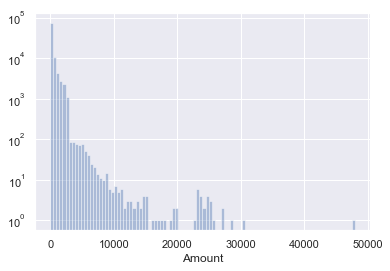

In [101]:
sns.set(font_scale=1.)
temp = myData2[myData2[attribute] >= 0]
ax = sns.distplot(temp[attribute],bins=100, kde=False)
ax.set_yscale('log')
plt.savefig('log.png')

In [103]:
myData2.to_csv('cleanDataFinal-yifeng.csv')